# Compute the single-point time spectra

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                  '/ccs/proj/cfd162/lcheung/amrwind-frontend/',
                ]
import sys, os, shutil, io
import numpy as np
for x in amrwindfedirs: sys.path.insert(1, x)

from functools import partial
import matplotlib.pyplot as plt

# Make all plots inline 
%matplotlib inline

import postproengine as ppeng

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load ruamel or pyyaml as needed
try:
    import ruamel.yaml
    yaml = ruamel.yaml.YAML(typ='unsafe', pure=True)
    useruamel=True
    loaderkwargs = {'Loader':yaml.RoundTripLoader}
    dumperkwargs = {'Dumper':yaml.RoundTripDumper, 'indent':4, 'default_flow_style':False}
    Loader=yaml.load
except:
    import yaml as yaml
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    Loader=yaml.safe_load

In [3]:
def spectrapoints():
    xrange = [0, 100, 200, 300, 400, 500]
    yrange = [0, 100, 200, 300, 400, 500]
    ptlist = []
    for x in xrange:
        for y in yrange:
            ptlist.append((x, y, 0))
    return ptlist

ppeng.spectrapoints = spectrapoints

In [4]:
yamlstring="""
globalattributes:
  verbose: False
  executeorder:
  - windspectra
  - plotcsv
  

windspectra:
- name: spectraZ027
  ncfile: /gpfs/lcheung/HFM/exawind-benchmarks/convective_abl/post_processing/XYdomain_027_30000.nc
  group: Farm_XYdomain027
  pointlocationfunction: postproengine.spectrapoints
  csvfile: ../results/spectra_Z027.csv
  #avgbins:  [15000, 15010]
  kaimal:
    ustarsource: ablstatsfile
    ablstatsfile:  /gpfs/lcheung/HFM/exawind-benchmarks/convective_abl/post_processing/abl_statistics30000.nc
    avgt: [15000, 20000]
    #ustar: 0.289809
    csvfile: ../results/kaimal_Z027.csv
    z: 27.0

- name: spectraZ090
  ncfile: /gpfs/lcheung/HFM/exawind-benchmarks/convective_abl/post_processing/XYdomain_090_30000.nc
  group: Farm_XYdomain090
  pointlocationfunction: postproengine.spectrapoints
  csvfile: ../results/spectra_Z090.csv
  #avgbins:  [15000, 15010]
  kaimal:
    ustarsource: ablstatsfile
    ablstatsfile:  /gpfs/lcheung/HFM/exawind-benchmarks/convective_abl/post_processing/abl_statistics30000.nc
    avgt: [15000, 20000]
    #ustar: 0.289809
    csvfile: ../results/kaimal_Z090.csv
    z: 90.0


plotcsv:
  - name: plotSuu
    xlabel: 'f [Hz]'
    ylabel: '$f S_{uu}/u_{\\tau}^2$'
    xscale: log
    yscale: log
    title: '$S_{uu}$'
    figsize: [5,4]
    legendopts: {'loc':'lower right'}
    figname: Z090
    axesnum: 0
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/spectra_Z090.csv', 'xcol':'f', 'ycol':'Suu', 'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'../results/kaimal_Z090.csv',  'xcol':'f', 'ycol':'Suu', 'lineopts':{'color':'k', 'lw':2, 'linestyle':'-', 'label':'Kaimal'}}
       
  - name: plotSvv
    xlabel: 'f [Hz]'
    ylabel: '$f S_{vv}/u_{\\tau}^2$'
    xscale: log
    yscale: log
    title: '$S_{vv}$'
    figsize: [5,4]
    legendopts: {'loc':'lower right'}
    figname: Z090
    axesnum: 1    
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/spectra_Z090.csv', 'xcol':'f', 'ycol':'Svv', 'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'../results/kaimal_Z090.csv',  'xcol':'f', 'ycol':'Svv', 'lineopts':{'color':'k', 'lw':2, 'linestyle':'-', 'label':'Kaimal'}}       
       
  - name: plotSww
    xlabel: 'f [Hz]'
    ylabel: '$f S_{ww}/u_{\\tau}^2$'
    xscale: log
    yscale: log
    title: '$S_{ww}$'
    figsize: [5,4]
    legendopts: {'loc':'lower right'}
    figname: Z090
    axesnum: 2    
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/spectra_Z090.csv', 'xcol':'f', 'ycol':'Sww',  'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'../results/kaimal_Z090.csv',  'xcol':'f', 'ycol':'Sww',  'lineopts':{'color':'k', 'lw':2, 'linestyle':'-', 'label':'Kaimal'}}   
       
  - name: plotSuuZ027
    xlabel: 'f [Hz]'
    ylabel: '$f S_{uu}/u_{\\tau}^2$'
    xscale: log
    yscale: log
    title: '$S_{uu}$'
    figsize: [5,4]
    legendopts: {'loc':'lower right'}
    figname: Z027
    axesnum: 0
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/spectra_Z027.csv', 'xcol':'f', 'ycol':'Suu', 'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'../results/kaimal_Z027.csv',  'xcol':'f', 'ycol':'Suu', 'lineopts':{'color':'k', 'lw':2, 'linestyle':'-', 'label':'Kaimal'}}
  - name: plotSvvZ027
    xlabel: 'f [Hz]'
    ylabel: '$f S_{vv}/u_{\\tau}^2$'
    xscale: log
    yscale: log
    title: '$S_{vv}$'
    figsize: [5,4]
    legendopts: {'loc':'lower right'}
    figname: Z027
    axesnum: 1
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/spectra_Z027.csv', 'xcol':'f', 'ycol':'Svv', 'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'../results/kaimal_Z027.csv',  'xcol':'f', 'ycol':'Svv', 'lineopts':{'color':'k', 'lw':2, 'linestyle':'-', 'label':'Kaimal'}}
  - name: plotSwwZ027
    xlabel: 'f [Hz]'
    ylabel: '$f S_{ww}/u_{\\tau}^2$'
    xscale: log
    yscale: log
    title: '$S_{ww}$'
    figsize: [5,4]
    legendopts: {'loc':'lower right'}
    figname: Z027
    axesnum: 2
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/spectra_Z027.csv', 'xcol':'f', 'ycol':'Sww', 'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'AMR-Wind'}}
    - {'file':'../results/kaimal_Z027.csv',  'xcol':'f', 'ycol':'Sww', 'lineopts':{'color':'k', 'lw':2, 'linestyle':'-', 'label':'Kaimal'}}
"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)
yamldict['windspectra'][0]['timeindices'] = list(range(10000))[::5]
yamldict['windspectra'][1]['timeindices'] = list(range(10000))[::5]

Initialized windspectra
Running windspectra
[============================================================] 100.0% 
Initialized kaimal inside windspectra
Executing kaimal
ustar =  0.4685868615973461
[============================================================] 100.0% 
Initialized kaimal inside windspectra
Executing kaimal
ustar =  0.4685868615973461
Initialized plotcsv
Running plotcsv


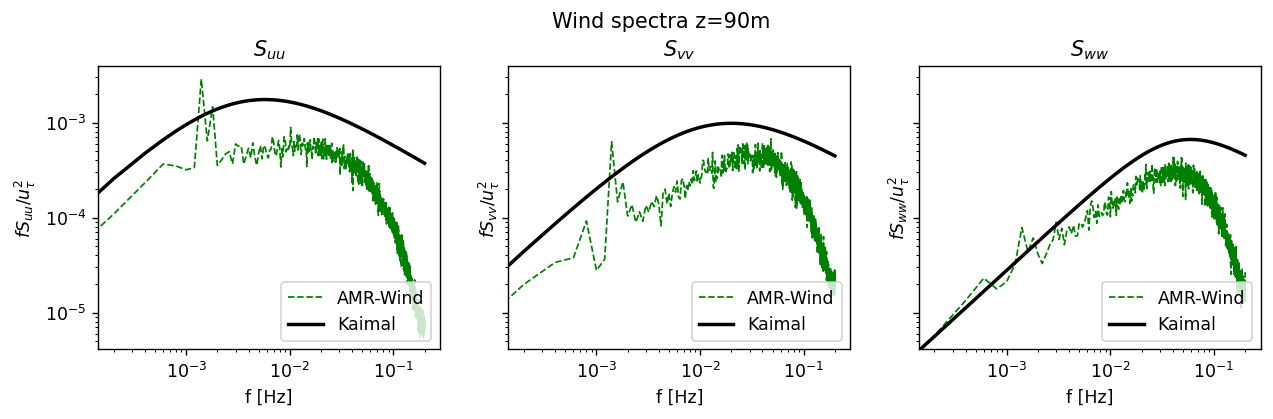

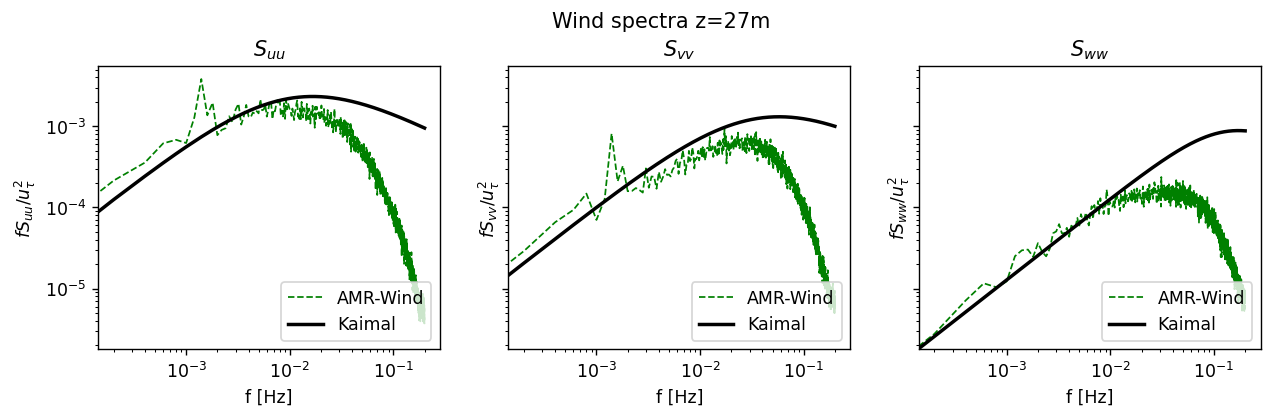

In [5]:
# Run the driver
fig1, axs = plt.subplots(1,3,num="Z027", figsize=(12,3), dpi=125, sharey=True)
fig1.suptitle('Wind spectra z=27m', y=1.025)
fig2, axs = plt.subplots(1,3,num="Z090", figsize=(12,3), dpi=125, sharey=True)
fig2.suptitle('Wind spectra z=90m', y=1.025)
ppeng.driver(yamldict, verbose=True)